In [3]:
pip install pandas matplotlib seaborn mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost",
                             user = "root",
                             password = "Shivam1234",
                             database = "ecommerce")

cur = db.cursor()
                                                         

# 1. List all unique cities where customers are located.

In [4]:
query = """ select distinct(customer_city) from customers """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# * no. of customers from each state

In [7]:
query = """ select distinct customer_state, count(customer_id) as NO_of_customers 
from customers
group by customer_state
order by NO_of_customers desc; """
cur.execute(query)
data = cur.fetchall()
data
# and if i want to dataframe
df = pd.DataFrame(data, columns = ["State", "NO_of_customers"])
df

,State,NO_of_customers
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


# * count all unique cities where customers are located.

In [12]:
query = """ select distinct count(customer_city) from customers; """
cur.execute(query)
data = cur.fetchall()
data[0][0]

99441

# * no of customers from each city

In [21]:

query = """ select distinct customer_city, count(customer_id) as NO_of_customers
from customers
group by customer_city
order by NO_of_customers desc; """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["City", "NO_of_customers"])
df

,City,NO_of_customers
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,siriji,1
4115,natividade da serra,1
4116,monte bonito,1
4117,sao rafael,1


# 2.Count the number of orders placed in 2017.

In [17]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 ; """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are",data[0][0] 

('total orders placed in 2017 are', 45101)

In [31]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2016 ; """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2016 are",data[0][0] 

('total orders placed in 2016 are', 329)

In [33]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2018 ; """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2018 are",data[0][0] 

('total orders placed in 2018 are', 54011)

# * Find the total sales per month

In [25]:
query = """
SELECT 
    YEAR(order_purchase_timestamp) AS year,
    MONTH(order_purchase_timestamp) AS month,
    ROUND(SUM(payments.payment_value), 2) AS total_sales
FROM 
    orders
JOIN 
    payments
ON 
    orders.order_id = payments.order_id
WHERE 
    YEAR(order_purchase_timestamp) IN (2016, 2017, 2018)
GROUP BY 
    YEAR(order_purchase_timestamp), MONTH(order_purchase_timestamp)
ORDER BY 
    YEAR(order_purchase_timestamp), MONTH(order_purchase_timestamp)
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Year", "Month", "Total_Sales"])
df

,Year,Month,Total_Sales
0,2016,9,252.24
1,2016,10,59090.48
2,2016,12,19.62
3,2017,1,138488.04
4,2017,2,291908.01
5,2017,3,449863.60
6,2017,4,417788.03
7,2017,5,592918.82
8,2017,6,511276.38
9,2017,7,592382.92


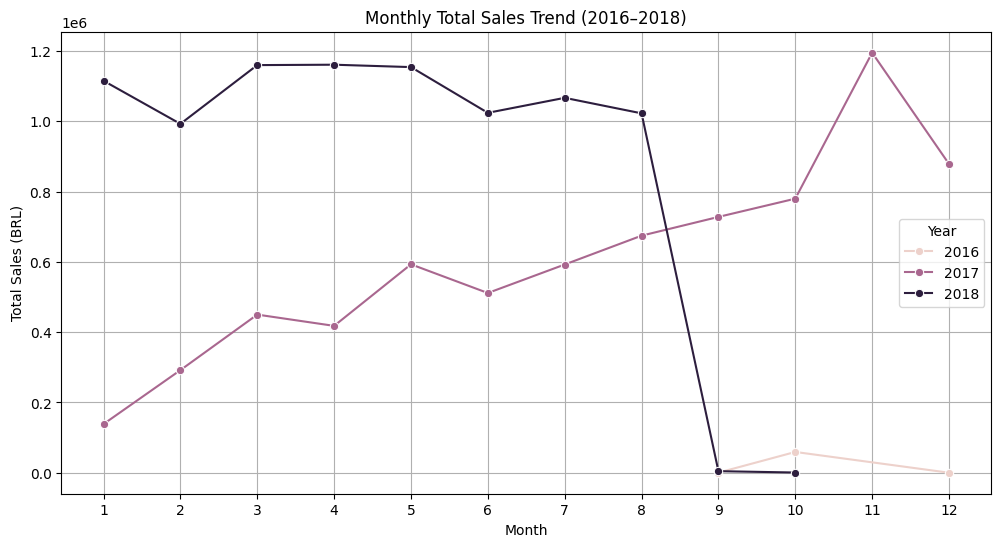

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Month", y="Total_Sales", hue="Year", marker="o")
plt.title("Monthly Total Sales Trend (2016–2018)")
plt.xlabel("Month")
plt.ylabel("Total Sales (BRL)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

 # 3. Find the total sales per category.

In [36]:
query = """ select upper(products.product_category_name) category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by product_category_name
order by sales Desc ; """

cur.execute(query)
data = cur.fetchall()
data

df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,CAMA_MESA_BANHO,1712553.67
1,BELEZA_SAUDE,1657373.12
2,INFORMATICA_ACESSORIOS,1585330.45
3,MOVEIS_DECORACAO,1430176.39
4,RELOGIOS_PRESENTES,1429216.68
...,...,...
69,PC_GAMER,2174.43
70,CASA_CONFORTO_2,1710.54
71,CDS_DVDS_MUSICAIS,1199.43
72,FASHION_ROUPA_INFANTO_JUVENIL,785.67


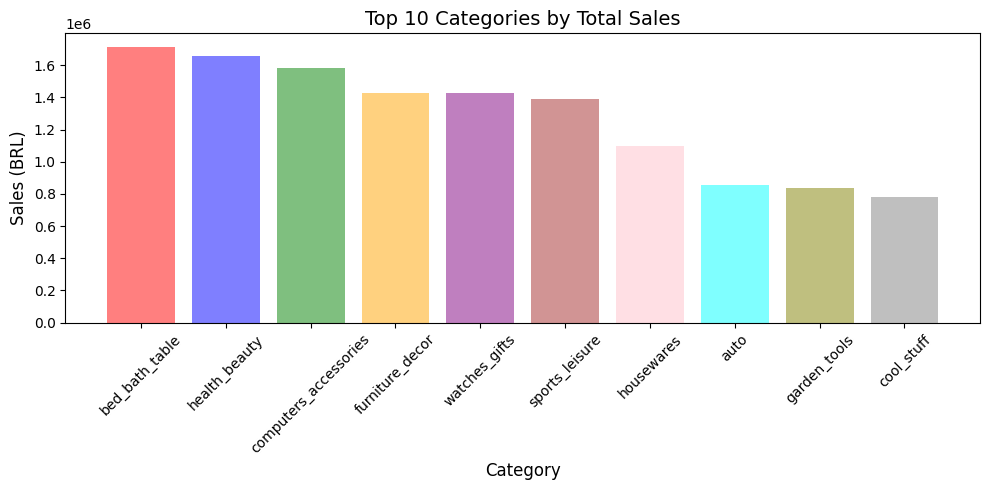

In [53]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'cyan', 'olive', 'grey']

# Show top 10 categories by sales
top10_df = df.sort_values(by="Sales", ascending=False).head(10)

# Create color map (can use 'viridis', 'plasma', 'tab10', etc.)
# colors = plt.cm.tab10(range(len(top10_df)))

plt.figure(figsize=(10, 5))
plt.bar(top10_df["Category"], top10_df["Sales"], color=colors,alpha=0.5)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Sales (BRL)", fontsize=12)
plt.title("Top 10 Categories by Total Sales", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# * Find the total sales per category (category name in english)

In [45]:
query = """
SELECT 
    product_category_name_translation.product_category_name_english AS Category,
    ROUND(SUM(payments.payment_value), 2) AS Sales
FROM 
    products
JOIN 
    product_category_name_translation 
    ON products.product_category_name = product_category_name_translation.product_category_name
JOIN 
    order_items 
    ON products.product_id = order_items.product_id
JOIN 
    payments
    ON order_items.order_id = payments.order_id
GROUP BY 
    product_category_name_translation.product_category_name_english
ORDER BY 
    Sales DESC
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "Sales"])
df

,Category,Sales
0,bed_bath_table,1712553.67
1,health_beauty,1657373.12
2,computers_accessories,1585330.45
3,furniture_decor,1430176.39
4,watches_gifts,1429216.68
...,...,...
66,flowers,2213.01
67,home_comfort_2,1710.54
68,cds_dvds_musicals,1199.43
69,fashion_childrens_clothes,785.67


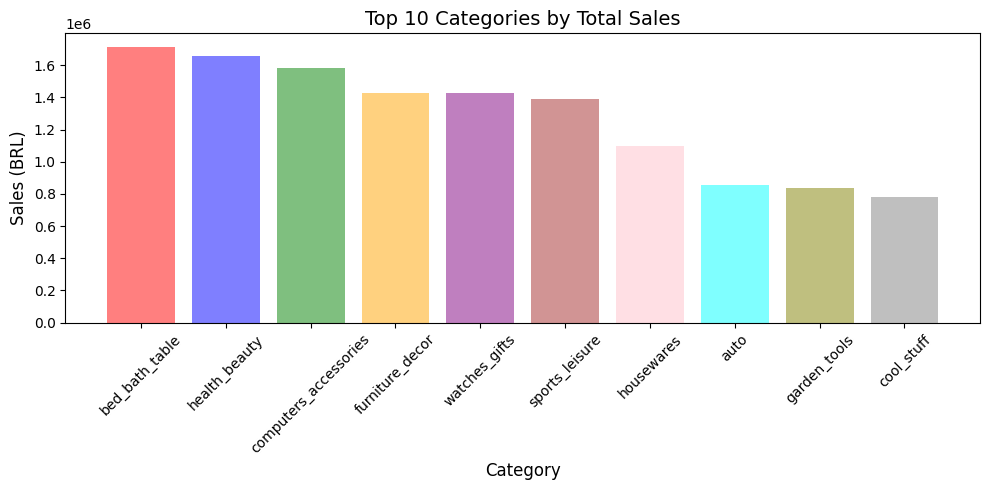

In [47]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'cyan', 'olive', 'grey']

# Show top 10 categories by sales
top10_df = df.sort_values(by="Sales", ascending=False).head(10)

# Create color map (can use 'viridis', 'plasma', 'tab10', etc.)
# colors = plt.cm.tab10(range(len(top10_df)))

plt.figure(figsize=(10, 5))
plt.bar(top10_df["Category"], top10_df["Sales"], color=colors,alpha=0.5)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Sales (BRL)", fontsize=12)
plt.title("Top 10 Categories by Total Sales", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# * Sum of sales and much profits per category

In [58]:

query = """
SELECT 
    product_category_name_translation.product_category_name_english AS Category,
    ROUND(SUM(payments.payment_value), 2) AS Sales,
    ROUND(SUM(payments.payment_value - order_items.price), 2) AS Profit,
    ROUND(
        (SUM(payments.payment_value - order_items.price) 
         / NULLIF(SUM(payments.payment_value), 0)) * 100, 2
    ) AS Profit_Percentage
FROM 
    products
JOIN 
    product_category_name_translation 
    ON products.product_category_name = product_category_name_translation.product_category_name
JOIN 
    order_items
    ON products.product_id = order_items.product_id
JOIN 
    payments
    ON order_items.order_id = payments.order_id
GROUP BY 
    product_category_name_translation.product_category_name_english
ORDER BY 
    Profit DESC
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "Sales", "Profit", "Profit_Percentage"])
df

,Category,Sales,Profit,Profit_Percentage
0,furniture_decor,1430176.39,665082.50,46.50
1,computers_accessories,1585330.45,643052.88,40.56
2,bed_bath_table,1712553.67,620002.65,36.20
3,housewares,1094758.13,428171.13,39.11
4,sports_leisure,1392127.56,368131.22,26.44
...,...,...,...,...
66,la_cuisine,2913.53,609.55,20.92
67,arts_and_craftmanship,2326.17,512.16,22.02
68,cds_dvds_musicals,1199.43,469.43,39.14
69,fashion_childrens_clothes,785.67,215.82,27.47


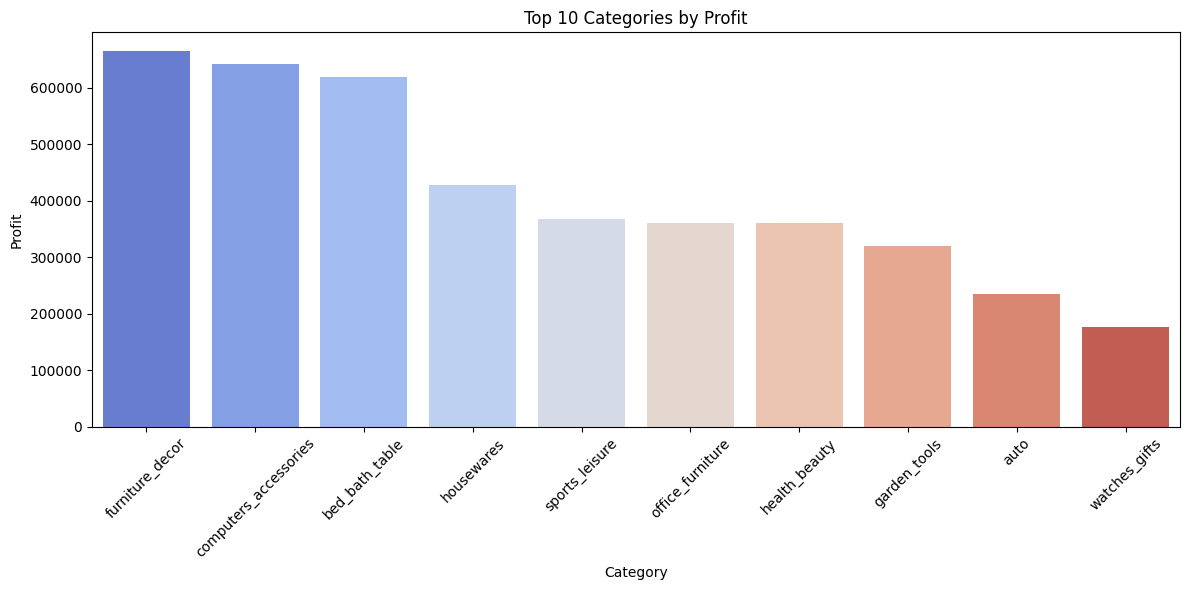

In [60]:

# Plot top 10 categories by profit (clean, no warning)
plt.figure(figsize=(12,6))
sns.barplot(data=df.sort_values('Profit', ascending=False).head(10), 
            x='Category', y='Profit', hue='Category', palette='coolwarm', legend=False)

plt.title('Top 10 Categories by Profit')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# * Sum of sales and much profits_percentage per category

In [63]:

query = """
SELECT 
    product_category_name_translation.product_category_name_english AS Category,
    ROUND(SUM(payments.payment_value), 2) AS Sales,
    ROUND(SUM(payments.payment_value - order_items.price), 2) AS Profit,
    ROUND(
        (SUM(payments.payment_value - order_items.price) 
         / NULLIF(SUM(payments.payment_value), 0)) * 100, 2
    ) AS Profit_Percentage
FROM 
    products
JOIN 
    product_category_name_translation 
    ON products.product_category_name = product_category_name_translation.product_category_name
JOIN 
    order_items
    ON products.product_id = order_items.product_id
JOIN 
    payments
    ON order_items.order_id = payments.order_id
GROUP BY 
    product_category_name_translation.product_category_name_english
ORDER BY 
    Profit_Percentage DESC
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "Sales", "Profit", "Profit_Percentage"])
df

,Category,Sales,Profit,Profit_Percentage
0,fixed_telephony,207010.42,145309.16,70.19
1,signaling_and_security,68488.05,46903.24,68.48
2,drinks,71429.65,48575.09,68.00
3,diapers_and_hygiene,4221.25,2653.66,62.86
4,office_furniture,646826.49,360667.53,55.76
...,...,...,...,...
66,small_appliances,225584.38,24667.72,10.94
67,musical_instruments,233074.12,22145.39,9.50
68,music,6901.43,643.23,9.32
69,small_appliances_home_oven_and_coffee,51229.32,2283.61,4.46


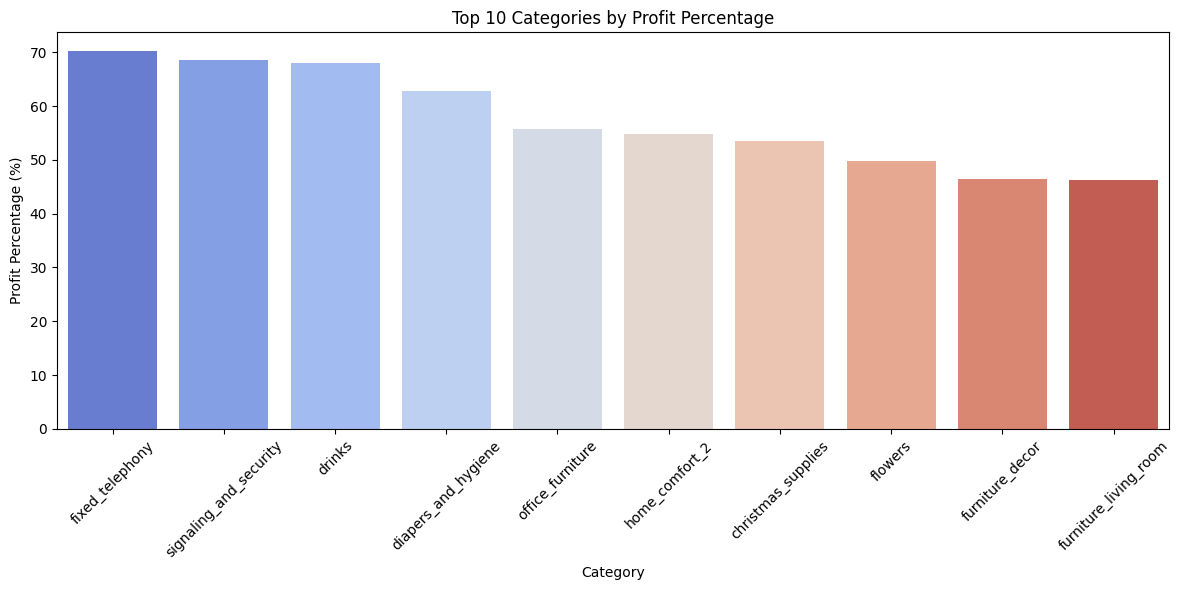

In [65]:

# Plot top 10 categories by profit percentage (clean, no warning)
plt.figure(figsize=(12,6))
sns.barplot(data=df.sort_values('Profit_Percentage', ascending=False).head(10), 
            x='Category', y='Profit_Percentage', hue='Category', palette='coolwarm', legend=False)

plt.title('Top 10 Categories by Profit Percentage')
plt.xlabel('Category')
plt.ylabel('Profit Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4.Calculate the percentage of orders that were paid in installments.

In [48]:
query = """ select (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*)*100 from payments """

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

In [42]:
# OR

In [50]:
query = """ select (sum(case when payment_installments > 1 then 1 else 0 end))/count(*)*100 from payments """

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('49.4176'))

# Count the number of customers from each state. 

In [72]:
query = """ select customer_state ,count(customer_id) from customers
group by customer_state; """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["state", "NO._of_customers"])
df = df.sort_values(by = "NO._of_customers", ascending = False)
df

,state,NO._of_customers
0,SP,41746
4,RJ,12852
2,MG,11635
5,RS,5466
3,PR,5045
1,SC,3637
9,BA,3380
13,DF,2140
8,ES,2033
7,GO,2020


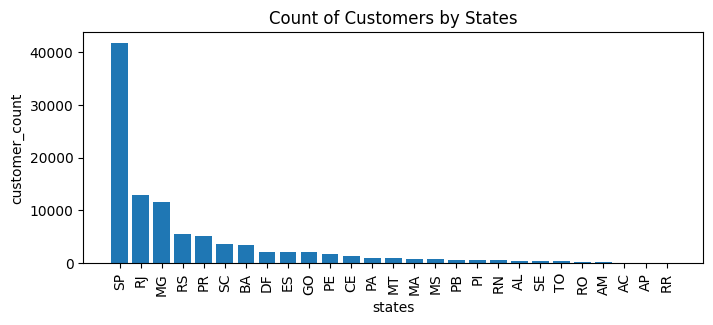

In [76]:
plt.figure(figsize = (8,3))
plt.bar(df["state"], df["NO._of_customers"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

# Calculate the number of orders per month in 2018.

In [84]:
query = """
SELECT 
    MONTHNAME(order_purchase_timestamp) AS Month_Name,
    COUNT(order_id) AS Order_Count
FROM 
    orders
WHERE 
    YEAR(order_purchase_timestamp) = 2018
GROUP BY 
    MONTH(order_purchase_timestamp), MONTHNAME(order_purchase_timestamp)
ORDER BY 
    MONTH(order_purchase_timestamp)
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Month", "Order_Count"])
df

,Month,Order_Count
0,January,7269
1,February,6728
2,March,7211
3,April,6939
4,May,6873
5,June,6167
6,July,6292
7,August,6512
8,September,16
9,October,4


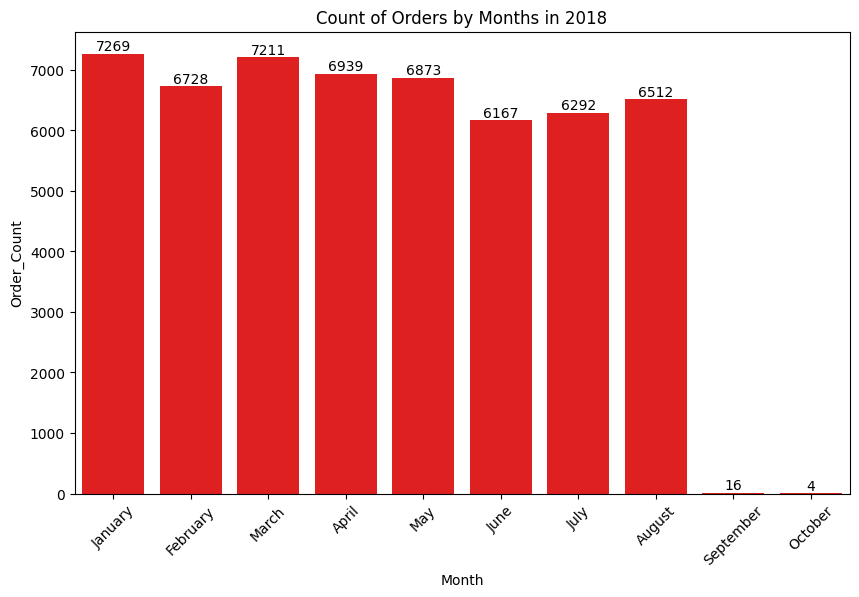

In [88]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = df["Month"],y = df["Order_Count"], data = df, order = o, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months in 2018")

plt.show()

# 2. Find the average number of products per order, grouped by customer city.

In [130]:
query = """ with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["customer_city", "average products per order"])
df

,customer_city,average products per order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
...,...,...
4105,lagoa da canoa,1.00
4106,japaratuba,1.00
4107,sebastiao leal,1.00
4108,morro agudo de goias,1.00


# 3. Calculate the percentage of total revenue contributed by each product category.

In [102]:
query = """select upper(products.product_category_name) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100, 2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category 
order by sales_percentage desc;
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["category", "percentage_distribution"])
df

,category,percentage_distribution
0,CAMA_MESA_BANHO,10.70
1,BELEZA_SAUDE,10.35
2,INFORMATICA_ACESSORIOS,9.90
3,MOVEIS_DECORACAO,8.93
4,RELOGIOS_PRESENTES,8.93
...,...,...
69,CASA_CONFORTO_2,0.01
70,CDS_DVDS_MUSICAIS,0.01
71,PC_GAMER,0.01
72,FASHION_ROUPA_INFANTO_JUVENIL,0.00


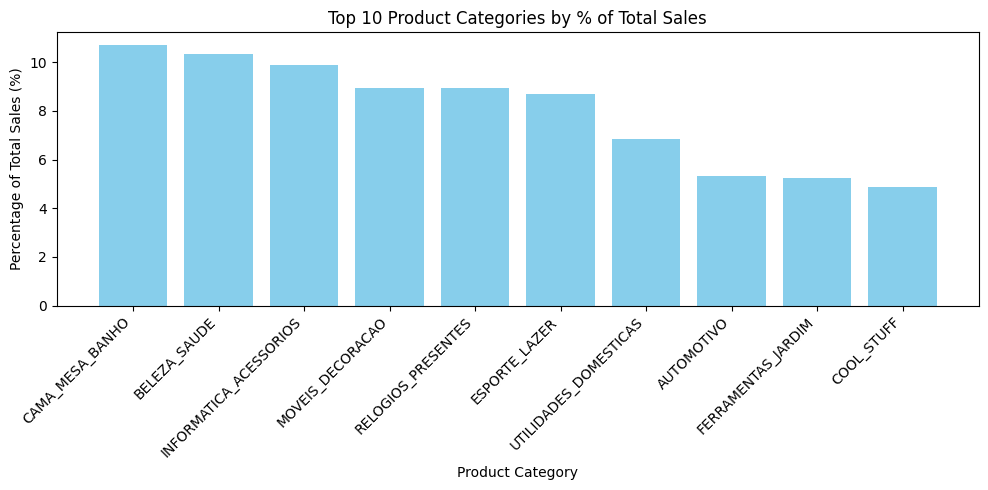

In [104]:
df_top10 = df.head(10)
# Plot
plt.figure(figsize=(10, 5))
plt.bar(df_top10["category"], df_top10["percentage_distribution"], color='skyblue')
plt.xlabel("Product Category")
plt.ylabel("Percentage of Total Sales (%)")
plt.title("Top 10 Product Categories by % of Total Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [34]:
query = """select products.product_category_name,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category_name"""


cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "order_count", "price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation between price and number of times a product has been purchased is:", a[0][1])

the correlation between price and number of times a product has been purchased is: -0.10631514167157562


 # 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [47]:
query = """select *, dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a 
"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.209999,3082
3091,702835e4b785b67a084280efca355756,18.559999,3083
3092,4965a7002cca77301c82d3f91b82e1a9,16.360001,3084
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3085


In [ ]:
# OR

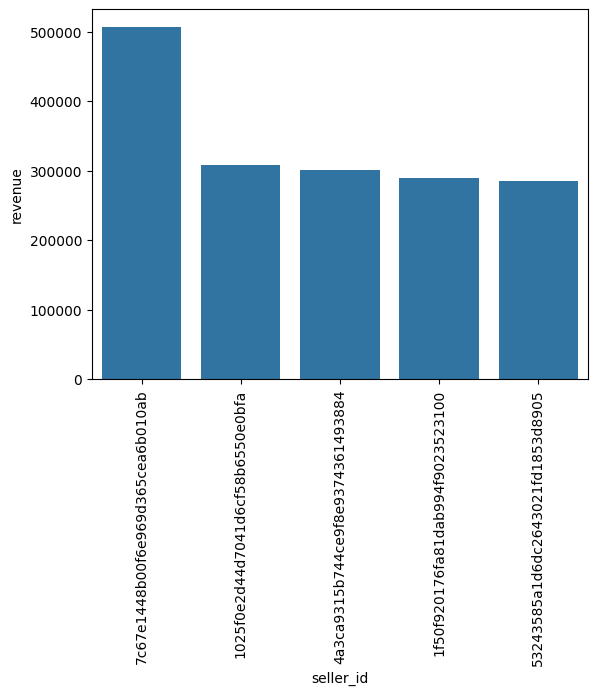

In [55]:
query = """select *, dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a 
"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [108]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a; """

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["customer_id", "order_purchase_timestamp", "price", "moving average"])
df

,customer_id,order_purchase_timestamp,price,moving average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# 2. Calculate the cumulative sales per month for each year.

In [129]:

query = """
SELECT 
    YEAR(o.order_purchase_timestamp) AS Year,
    MONTHNAME(o.order_purchase_timestamp) AS Month,
    ROUND(SUM(p.payment_value), 2) AS Monthly_Sales,
    ROUND(SUM(SUM(p.payment_value)) OVER (
        PARTITION BY YEAR(o.order_purchase_timestamp)
        ORDER BY MONTH(o.order_purchase_timestamp)
    ), 2) AS Cumulative_Sales
FROM 
    orders o
JOIN 
    payments p
    ON o.order_id = p.order_id
GROUP BY 
    YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp), MONTHNAME(o.order_purchase_timestamp)
ORDER BY 
    Year, MONTH(o.order_purchase_timestamp)
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Year", "Month", "Monthly_Sales", "Cumulative_Sales"])
df

,Year,Month,Monthly_Sales,Cumulative_Sales
0,2016,September,252.24,252.24
1,2016,October,59090.48,59342.72
2,2016,December,19.62,59362.34
3,2017,January,138488.04,138488.04
4,2017,February,291908.01,430396.05
5,2017,March,449863.60,880259.65
6,2017,April,417788.03,1298047.68
7,2017,May,592918.82,1890966.50
8,2017,June,511276.38,2402242.88
9,2017,July,592382.92,2994625.80


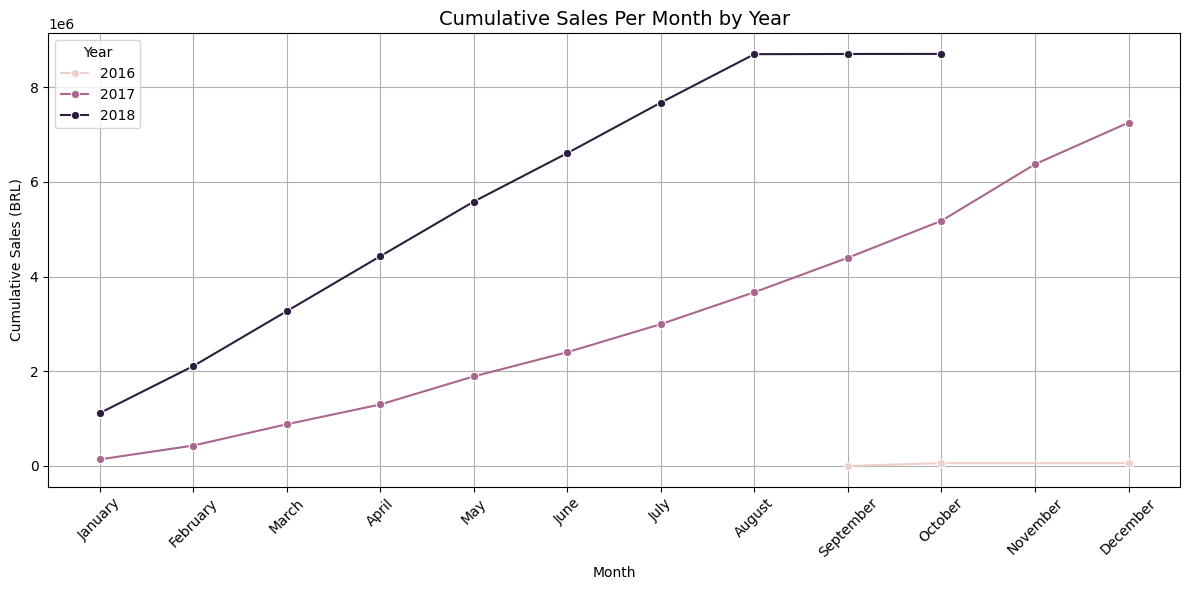

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: to make sure months are ordered properly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df = df.sort_values(['Year', 'Month'])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Cumulative_Sales', hue='Year', marker='o')
plt.title('Cumulative Sales Per Month by Year', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Cumulative Sales (BRL)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Calculate the year-over-year growth rate of total sales.

In [134]:
query = """
WITH yearly_sales AS (
    SELECT 
        YEAR(o.order_purchase_timestamp) AS Year,
        ROUND(SUM(p.payment_value), 2) AS Total_Sales
    FROM 
        orders o
    JOIN 
       payments p
        ON o.order_id = p.order_id
    GROUP BY 
        YEAR(o.order_purchase_timestamp)
)
SELECT 
    y.Year,
    y.Total_Sales,
    ROUND(((y.Total_Sales - LAG(y.Total_Sales) OVER (ORDER BY y.Year)) / 
           LAG(y.Total_Sales) OVER (ORDER BY y.Year)) * 100, 2) AS YoY_Growth_Percentage
FROM 
    yearly_sales y
ORDER BY 
    y.Year
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Year", "Total_Sales", "YoY % growth"])
df
 ## (formula of) year over year ((YoY % growth))= [(current sales - previous_year sales)/previous_year sales] multiplied by 100 to get a percentage.
 ##OR##
 ## (formula of) year over year ((YoY % growth))= (y.Total_Sales - LAG(y.Total_Sales) OVER (ORDER BY y.Year)) / LAG(y.Total_Sales) OVER (ORDER BY y.Year)) * 100, 2) AS YoY_Growth_Percentage

,Year,Total_Sales,yoy % growth
0,2016,59362.34,NaN
1,2017,7249746.75,12112.7
2,2018,8699763.05,20.0


# * Calculate the month-over-month growth rate of total sales.

In [138]:
query = """
WITH monthly_sales AS (
    SELECT 
        YEAR(o.order_purchase_timestamp) AS Year,
        MONTH(o.order_purchase_timestamp) AS Month_Number,
        MONTHNAME(o.order_purchase_timestamp) AS Month_Name,
        ROUND(SUM(p.payment_value), 2) AS Monthly_Sales
    FROM 
        orders o
    JOIN 
        payments p
        ON o.order_id = p.order_id
    GROUP BY 
        YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp), MONTHNAME(o.order_purchase_timestamp)
)
SELECT 
    Year,
    Month_Name,
    Monthly_Sales,
    ROUND(((Monthly_Sales - LAG(Monthly_Sales) OVER (ORDER BY Year, Month_Number)) / 
            LAG(Monthly_Sales) OVER (ORDER BY Year, Month_Number)) * 100, 2) AS MoM_Growth_Percentage
FROM 
    monthly_sales
ORDER BY 
    Year, Month_Number
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Year", "Month", "Monthly_Sales", "MoM % growth"])
df

,Year,Month,Monthly_Sales,MoM % growth
0,2016,September,252.24,NaN
1,2016,October,59090.48,23326.29
2,2016,December,19.62,-99.97
3,2017,January,138488.04,705751.38
4,2017,February,291908.01,110.78
5,2017,March,449863.60,54.11
6,2017,April,417788.03,-7.13
7,2017,May,592918.82,41.92
8,2017,June,511276.38,-13.77
9,2017,July,592382.92,15.86


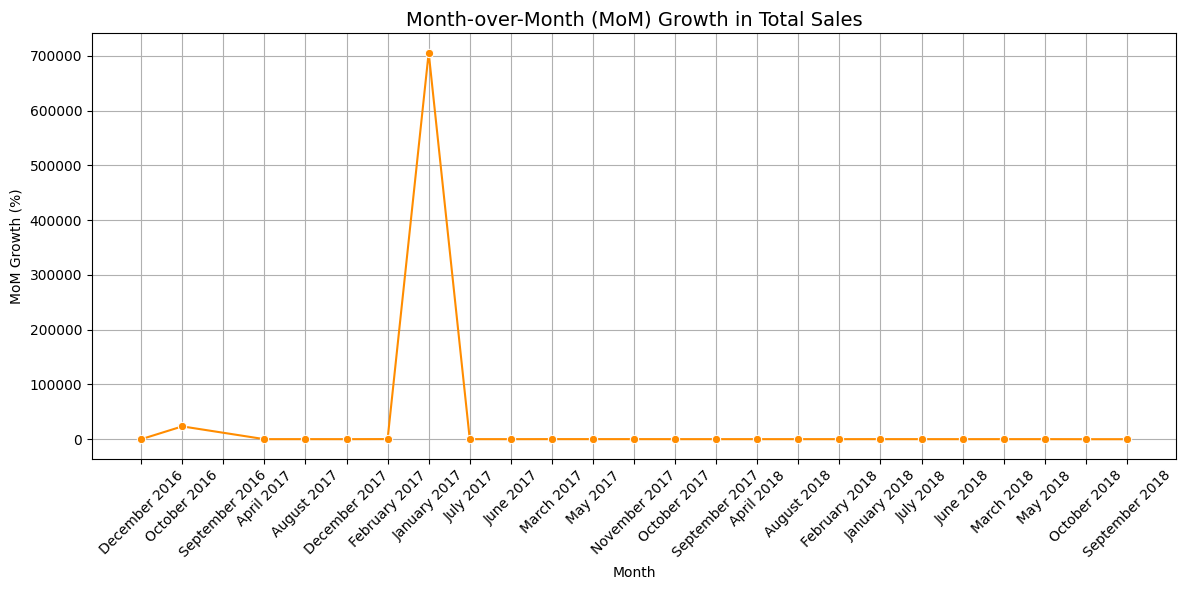

In [140]:

import matplotlib.pyplot as plt
import seaborn as sns

# Combine Year and Month to make a proper time label
df['Month_Label'] = df['Month'] + ' ' + df['Year'].astype(str)

# Sort chronologically (optional but safer)
df = df.sort_values(['Year', 'Month'])

# Plot the MoM Growth
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Label', y='MoM % growth', data=df, marker='o', color='darkorange')
plt.xticks(rotation=45)
plt.title('Month-over-Month (MoM) Growth in Total Sales', fontsize=14)
plt.xlabel('Month')
plt.ylabel('MoM Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [31]:
query = """ with a as(select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id) ,

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) necxt_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order 
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month) 
group by a.customer_id) 

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b 
on a.customer_id = b.customer_id ; """

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

# 5.Identify the top 3 customers who spent the most money in each year.

<function matplotlib.pyplot.show(close=None, block=None)>

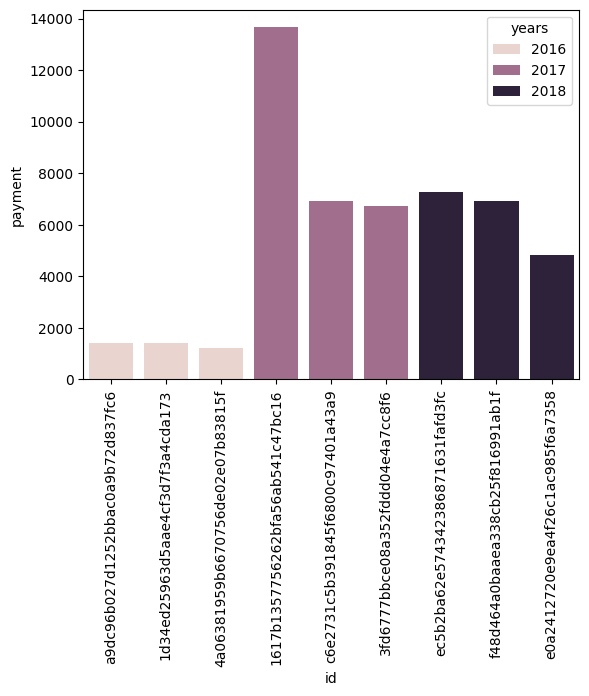

In [48]:
query = """ select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years, 
orders.customer_id,
sum(payments.payment_value) payment, 
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ; """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["years", "id", "payment", "rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show

                  

# CHATGPTs QUERIES

# 1. What are the unique product categories available?

In [144]:
query = """ select distinct(product_category_name) as product_categories from products;"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["product_categories"])
df

,product_categories
0,perfumaria
1,artes
2,esporte_lazer
3,bebes
4,utilidades_domesticas
...,...
69,casa_conforto_2
70,portateis_cozinha_e_preparadores_de_alimentos
71,seguros_e_servicos
72,moveis_colchao_e_estofado


# 2. How many sellers are there in the dataset?

In [18]:
query = """ select count(distinct(seller_id)) as total_sellers from sellers """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["total_sellers"])
df
df.head()

,total_sellers
0,3095


# 3. Find the number of orders per payment type.

In [21]:
query = """ select count(order_id), payment_type from payments
group by payment_type
"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["order_id","payment_type"])
df

,order_id,payment_type
0,76795,credit_card
1,19784,boleto
2,5775,voucher
3,1529,debit_card
4,3,not_defined


<function matplotlib.pyplot.show(close=None, block=None)>

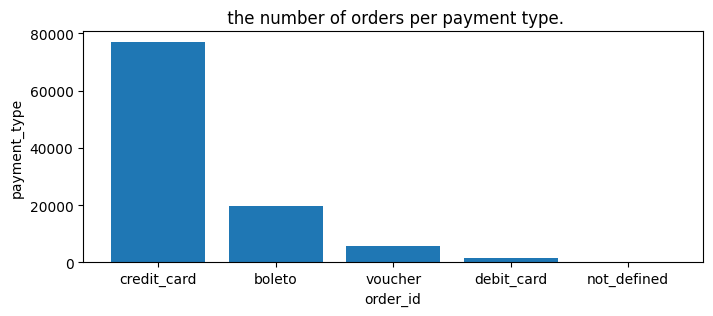

In [23]:
df = pd.DataFrame(data, columns = ["order_id","payment_type"])
df = df.sort_values(by = "order_id", ascending = False)
df
plt.figure(figsize = (8,3))
plt.bar(df["payment_type"], df["order_id"])
plt.xlabel("order_id")
plt.ylabel("payment_type")
plt.title(" the number of orders per payment type.")
plt.xticks(rotation = 0)
plt.show 

# 4. List the top 10 cities with the highest number of orders.

In [28]:
query = """ select customers.customer_city as cities, count(orders.order_id) as total_orders
from customers join orders
on customers.customer_id = orders.customer_id
group by cities
order by total_orders desc
limit 10;
; """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["cities","total_orders"])
df

,cities,total_orders
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


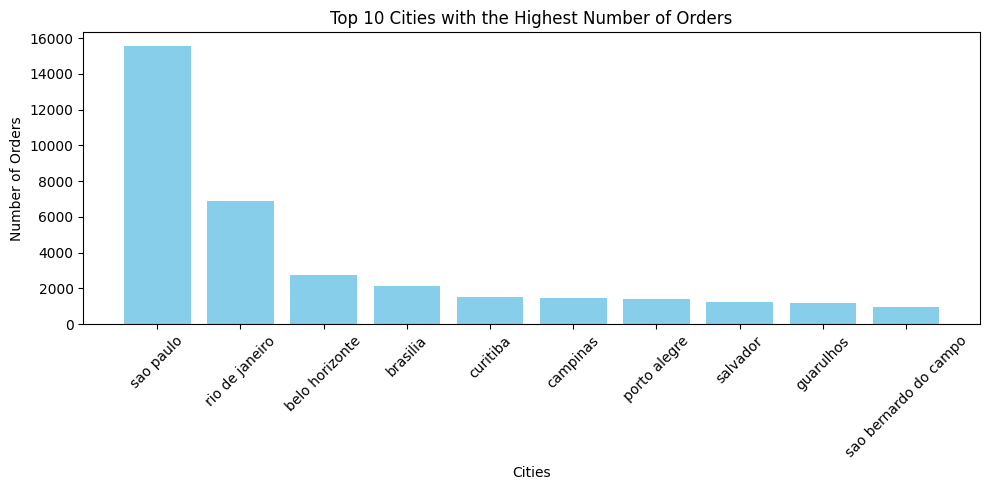

In [34]:
import matplotlib.pyplot as plt

# Sort DataFrame to ensure it's ordered (if not already)
df = df.sort_values(by="total_orders", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(df["cities"], df["total_orders"], color="skyblue")
plt.xlabel("Cities")
plt.ylabel("Number of Orders")
plt.title("Top 10 Cities with the Highest Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

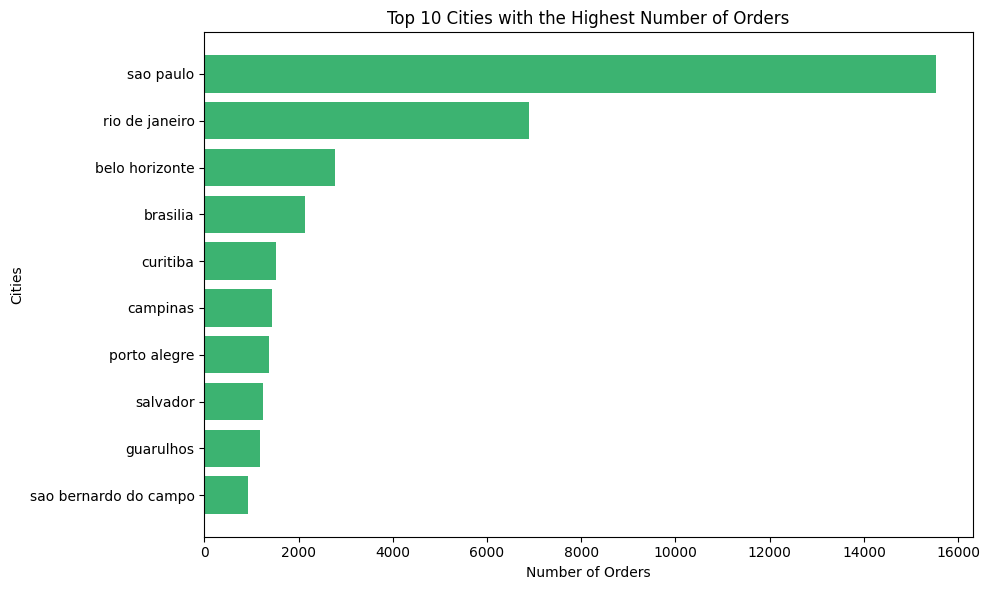

In [36]:
plt.figure(figsize=(10, 6))
plt.barh(df["cities"], df["total_orders"], color="mediumseagreen")
plt.xlabel("Number of Orders")
plt.ylabel("Cities")
plt.title("Top 10 Cities with the Highest Number of Orders")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

# * group by sales

In [147]:
query = """
WITH city_metrics AS (
    SELECT 
        c.customer_city AS City,
        COUNT(DISTINCT o.order_id) AS Total_Orders,
        ROUND(SUM(p.payment_value), 2) AS Total_Sales,
        ROUND(SUM(p.payment_value - i.price), 2) AS Profit,
        ROUND(
            (SUM(p.payment_value - i.price) / NULLIF(SUM(p.payment_value), 0)) * 100, 
            2
        ) AS Profit_Percentage
    FROM 
        customers c
    JOIN 
        orders o ON c.customer_id = o.customer_id
    JOIN 
        order_items i ON o.order_id = i.order_id
    JOIN 
        payments p ON o.order_id = p.order_id
    GROUP BY 
        c.customer_city
)
SELECT 
    City,
    Total_Orders,
    Total_Sales,
    Profit,
    Profit_Percentage
FROM 
    city_metrics
ORDER BY 
    Total_Sales DESC
LIMIT 10
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["City", "Total_Orders", "Total_Sales", "Profit", "Profit_Percentage"])
df

,City,Total_Orders,Total_Sales,Profit,Profit_Percentage
0,sao paulo,15402,2839903.47,831649.08,29.28
1,rio de janeiro,6834,1566591.65,535875.81,34.21
2,belo horizonte,2750,501261.50,134280.17,26.79
3,brasilia,2116,430499.43,118224.86,27.46
4,curitiba,1510,329321.54,110789.07,33.64
5,porto alegre,1372,315729.22,120093.64,38.04
6,salvador,1238,289139.66,92464.11,31.98
7,campinas,1429,267039.20,71412.71,26.74
8,goiania,687,212702.97,98304.92,46.22
9,guarulhos,1178,205350.25,50133.40,24.41


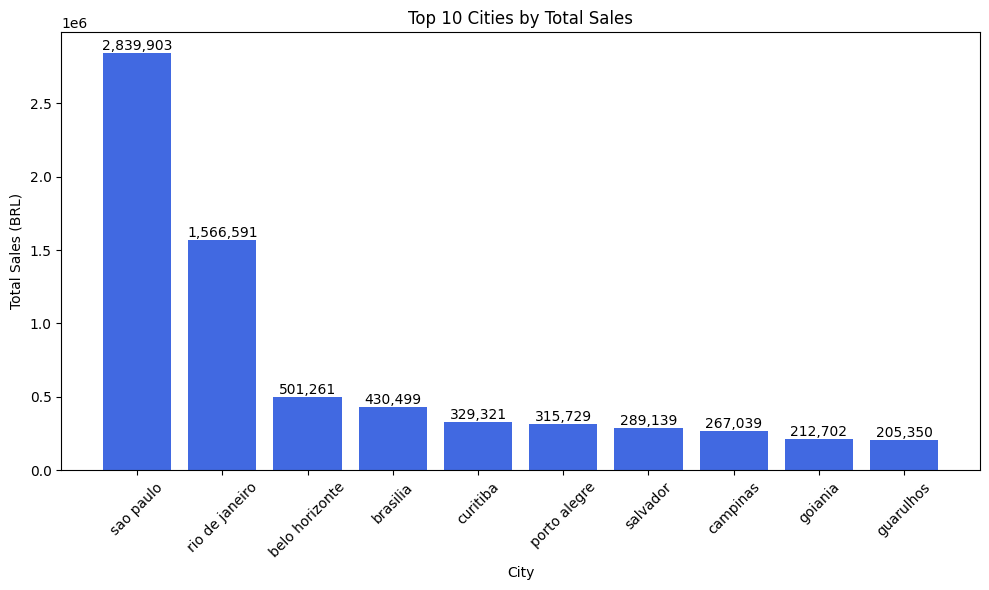

In [149]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df["City"], df["Total_Sales"], color="royalblue")

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f"{int(yval):,}", ha='center', va='bottom')

plt.xlabel("City")
plt.ylabel("Total Sales (BRL)")
plt.title("Top 10 Cities by Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# * group by profit

In [152]:
query = """
SELECT 
    customers.customer_city AS City,
    COUNT(DISTINCT orders.order_id) AS Total_Orders,
    ROUND(SUM(payments.payment_value), 2) AS Total_Sales,
    ROUND(SUM(payments.payment_value - order_items.price), 2) AS Profit,
    ROUND(
        (SUM(payments.payment_value - order_items.price) / 
         NULLIF(SUM(payments.payment_value), 0)) * 100, 
        2
    ) AS Profit_Percentage
FROM 
    customers
JOIN 
    orders
    ON customers.customer_id = orders.customer_id
JOIN 
    order_items 
    ON orders.order_id = order_items.order_id
JOIN 
    payments 
    ON orders.order_id = payments.order_id
GROUP BY 
    customers.customer_city
ORDER BY 
    Profit DESC
LIMIT 10;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["City", "Total_Orders", "Total_Sales", "Profit", "Profit_Percentage"])
df

,City,Total_Orders,Total_Sales,Profit,Profit_Percentage
0,sao paulo,15402,2839903.47,831649.08,29.28
1,rio de janeiro,6834,1566591.65,535875.81,34.21
2,belo horizonte,2750,501261.50,134280.17,26.79
3,porto alegre,1372,315729.22,120093.64,38.04
4,brasilia,2116,430499.43,118224.86,27.46
5,curitiba,1510,329321.54,110789.07,33.64
6,goiania,687,212702.97,98304.92,46.22
7,salvador,1238,289139.66,92464.11,31.98
8,campinas,1429,267039.20,71412.71,26.74
9,guarulhos,1178,205350.25,50133.40,24.41


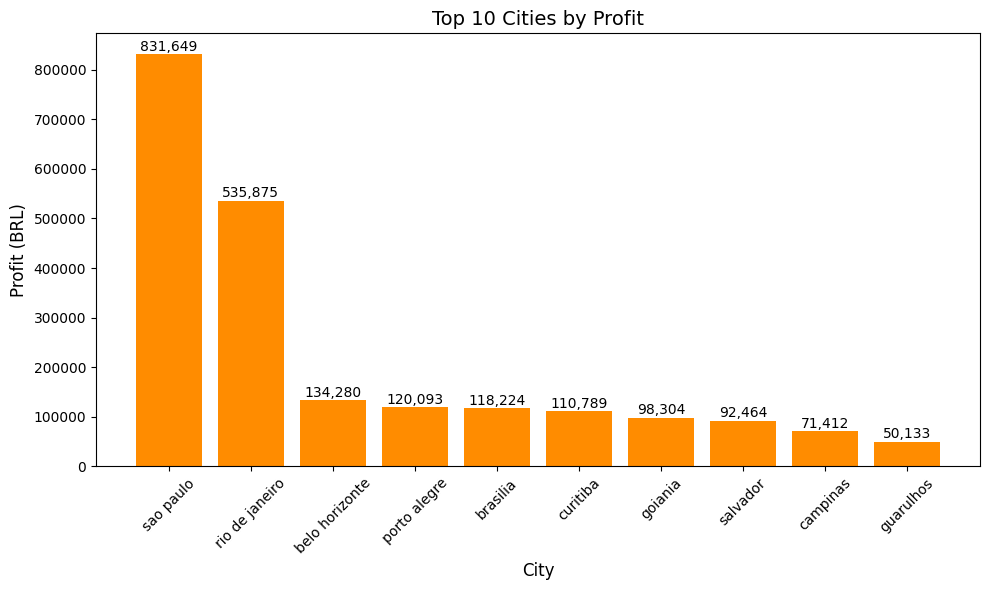

In [160]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df["City"], df["Profit"], color="darkorange")
# Add labels (profit values) above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height + 500,                      # Y position (a bit above the bar)
        f"{int(height):,}",                # Label (comma-separated number)
        ha='center', va='bottom'
    )
plt.xlabel("City", fontsize=12)
plt.ylabel("Profit (BRL)", fontsize=12)
plt.title("Top 10 Cities by Profit", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# * group by profit percentage

In [163]:
query = """
SELECT 
    customers.customer_city AS City,
    COUNT(DISTINCT orders.order_id) AS Total_Orders,
    ROUND(SUM(payments.payment_value), 2) AS Total_Sales,
    ROUND(SUM(payments.payment_value - order_items.price), 2) AS Profit,
    ROUND(
        (SUM(payments.payment_value - order_items.price) / 
         NULLIF(SUM(payments.payment_value), 0)) * 100, 
        2
    ) AS Profit_Percentage
FROM 
    customers
JOIN 
    orders
    ON customers.customer_id = orders.customer_id
JOIN 
    order_items 
    ON orders.order_id = order_items.order_id
JOIN 
    payments 
    ON orders.order_id = payments.order_id
GROUP BY 
    customers.customer_city
ORDER BY 
    Profit_Percentage DESC
LIMIT 10;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["City", "Total_Orders", "Total_Sales", "Profit", "Profit_Percentage"])
df

,City,Total_Orders,Total_Sales,Profit,Profit_Percentage
0,celso ramos,2,15157.63,14020.84,92.50
1,alto paraiso de goias,9,14520.23,13152.89,90.58
2,inconfidentes,2,961.97,861.98,89.61
3,cicero dantas,10,26425.26,23347.24,88.35
4,curralinho,1,1421.16,1232.40,86.72
5,padre carvalho,1,4080.58,3517.58,86.20
6,morro agudo,10,13347.79,11496.84,86.13
7,datas,1,5525.64,4745.64,85.88
8,matias olimpio,1,4207.00,3607.00,85.74
9,brasileia,1,418.59,358.89,85.74


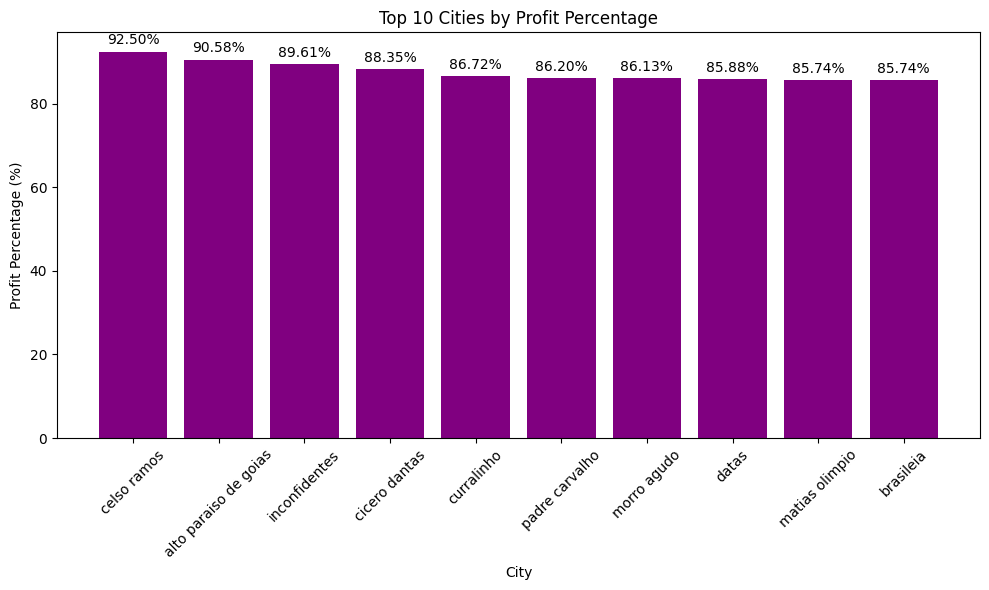

In [165]:
# Sort by Profit Percentage 
df_sorted_percent = df.sort_values("Profit_Percentage", ascending=False)
# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sorted_percent["City"], df_sorted_percent["Profit_Percentage"], color="purple")
# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', va='bottom')
plt.xlabel("City")
plt.ylabel("Profit Percentage (%)")
plt.title("Top 10 Cities by Profit Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Count the number of reviews with each rating (1 to 5)

In [169]:
query = """ select count(review_id), review_score
from order_reviews
group by review_score;

; """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["count of review_id","review_score"])
df

,count of review_id,review_score
0,19142,4
1,57328,5
2,11424,1
3,8179,3
4,3151,2


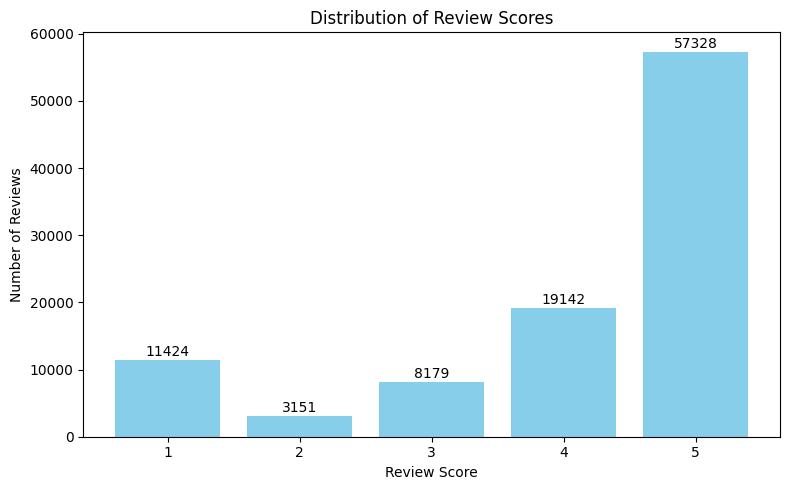

In [171]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
bars = plt.bar(df["review_score"], df["count of review_id"], color="skyblue")
# Add labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f"{int(height)}", ha='center', va='bottom')
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Scores")
plt.xticks(df["review_score"])  # Ensure only 1 to 5 ticks
plt.tight_layout()
plt.show()

# 6. Find the earliest and latest order dates in the dataset.

In [42]:
query = """ select order_id, date(order_purchase_timestamp) as earliest
from orders
order by earliest
limit 1;
; """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["order_id","earliest_date_of_order"])
df

,order_id,earliest_date_of_order
0,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04


In [44]:
query = """ select order_id, date(order_purchase_timestamp) as latest
from orders
order by latest desc
limit 1;
; """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["order_id","latest_date_of_order"])
df

,order_id,latest_date_of_order
0,10a045cdf6a5650c21e9cfeb60384c16,2018-10-17


# 1. Calculate average delivery time (from order to delivered date)

In [19]:
query = """ SELECT ROUND(AVG(DATEDIFF(order_delivered_customer_date, order_purchase_timestamp)),2) AS avg_delivery_time_days
FROM ecommerce.orders
WHERE order_status = "delivered"
AND order_delivered_customer_date IS NOT NULL
AND order_purchase_timestamp IS NOT NULL;
 """
cur.execute(query)
data = cur.fetchall()
print(f"Average Delivery time: {float(data[0][0])} days")

Average Delivery time: 12.5 days


# 2. Find the average review score by product category

In [51]:
query = """ select products.product_category_name, avg(order_reviews.review_score) as avg_prod_review
from products join order_items
on products.product_id = order_items.product_id
join order_reviews
on order_reviews.order_id = order_items.order_id
group by product_category_name;
 """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["product_category_name","avg_prod_review"])
df

,product_category_name,avg_prod_review
0,relogios_presentes,4.0192
1,livros_tecnicos,4.3684
2,informatica_acessorios,3.9308
3,eletronicos,4.0375
4,esporte_lazer,4.1080
...,...,...
69,cds_dvds_musicais,4.6429
70,la_cuisine,4.0000
71,fashion_roupa_infanto_juvenil,4.5000
72,pc_gamer,3.3333


# 3. Analyze average payment value per category.

In [54]:
query = """ select products.product_category_name as category, round(avg(payments.payment_value),2) as avg_payment
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by product_category_name
"""
cur.execute(query)
data = cur.fetchall()
data
# and if i want to dataframe
df = pd.DataFrame(data, columns = ["Catogory", "avg_payment"])
df

,Catogory,avg_payment
0,perfumaria,142.34
1,moveis_decoracao,163.56
2,telefonia,103.13
3,fashion_bolsas_e_acessorios,101.42
4,cama_mesa_banho,144.85
...,...,...
69,cds_dvds_musicais,85.67
70,la_cuisine,182.10
71,fashion_roupa_infanto_juvenil,98.21
72,pc_gamer,217.44


# 4. Analyze average payment value per order status.

In [188]:
query = """SELECT orders.order_status, ROUND(AVG(payments.payment_value),2) AS avg_payment_value
FROM ecommerce.orders
JOIN ecommerce.payments
ON orders.order_id = payments.order_id
GROUP BY orders.order_status
ORDER BY avg_payment_value DESC; """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["order_status", "avg_payment_value"])
df

,order_status,avg_payment_value
0,processing,217.54
1,canceled,215.75
2,invoiced,212.73
3,unavailable,194.88
4,delivered,153.07
5,shipped,151.98
6,created,137.62
7,approved,120.54


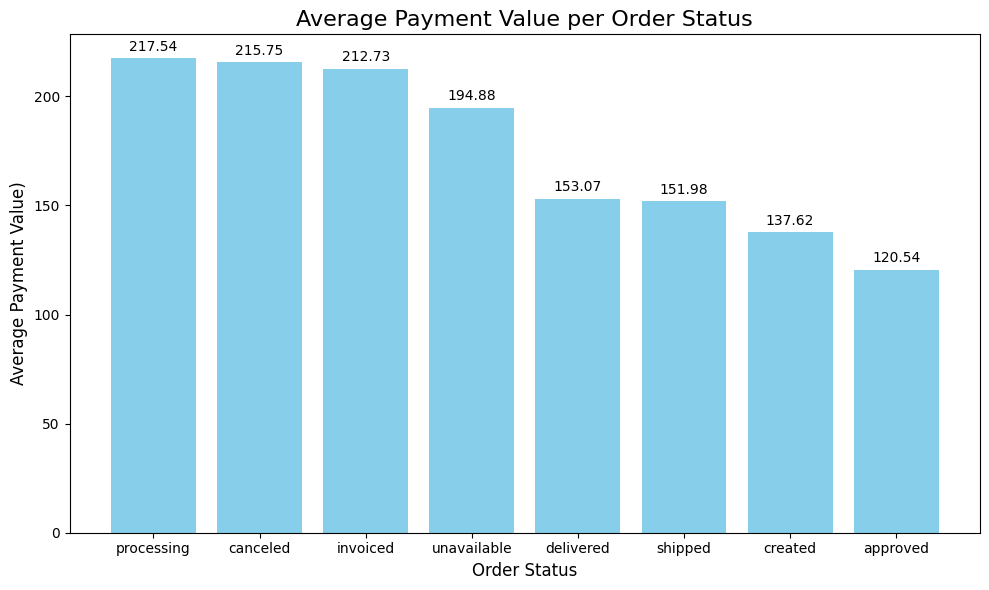

In [190]:
import matplotlib.pyplot as plt

# Sort the data for better visual order (highest to lowest)
df_sorted = df.sort_values("avg_payment_value", ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(df_sorted["order_status"], df["avg_payment_value"], color = "skyblue") 
# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f"{height:.2f}", ha='center', va='bottom')

plt.title("Average Payment Value per Order Status", fontsize = 16)
plt.xlabel("Order Status", fontsize = 12),
plt.ylabel("Average Payment Value)", fontsize = 12)
plt.tight_layout()
plt.show()

# 5. Identify the number of sellers with sales above a certain threshold

In [51]:
# Suppose my threshold is $ 10,000 in total sales:
query = """
SELECT COUNT(*) AS num_sellers_above_threshold
FROM (
   SELECT 
      order_items.seller_id, 
      SUM(order_items.price) AS total_sales
   FROM order_items
   JOIN orders ON order_items.order_id = orders.order_id
   WHERE orders.order_status = "delivered"
   GROUP BY order_items.seller_id 
   HAVING total_sales > 10000
) AS high_earning_sellers;
"""
cur.execute(query)
data = cur.fetchall()
print("Number of sellers above threshold : ", data[0][0])



Number of sellers above threshold :  282


###   1. Predict average delivery time per region using historical data.

In [39]:
query = """
SELECT 
    customers.customer_state AS region,
    ROUND(AVG(DATEDIFF(orders.order_delivered_customer_date, orders.order_purchase_timestamp)), 2) AS avg_delivery_time
FROM 
    orders 
JOIN 
    customers ON orders.customer_id = customers.customer_id
WHERE 
    orders.order_status = 'delivered'
    AND orders.order_delivered_customer_date IS NOT NULL
    AND orders.order_purchase_timestamp IS NOT NULL
GROUP BY 
    customers.customer_state
ORDER BY 
    avg_delivery_time DESC;
"""

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=['Region', 'Avg Delivery Time(in days)'])
df

,Region,Avg Delivery Time(in days)
0,RR,29.34
1,AP,27.18
2,AM,26.36
3,AL,24.50
4,PA,23.73
5,MA,21.51
6,SE,21.46
7,CE,21.20
8,AC,21.00
9,PB,20.39


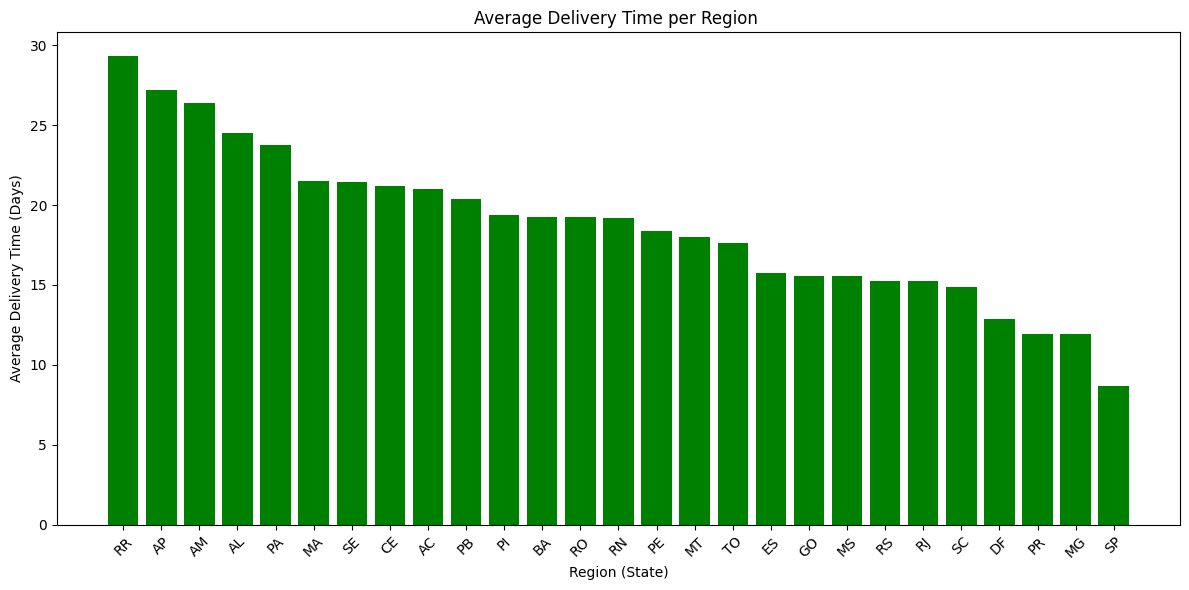

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df['Region'], df['Avg Delivery Time(in days)'], color='green')
plt.xlabel('Region (State)')
plt.ylabel('Average Delivery Time (Days)')
plt.title('Average Delivery Time per Region ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
###  2. Cluster customers based on total spending and number of orders.

In [61]:
###  3. Analyze refund or cancellation patterns (if status column allows).

# 4. Identify peak sales hours (if timestamp available).

In [18]:
query = """ SELECT
                EXTRACT(HOUR FROM order_purchase_timestamp) AS purchase_hour,
                COUNT(*) AS total_orders
            FROM orders
            GROUP BY purchase_hour
            ORDER BY total_orders DESC; """

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=['purchase_hour', 'total no. of orders'])
df
# Benifit: we can be able to know which time is better for selling.
        #  and we can plan marketing campaigns, dekivery schedule, customer services,etc according to this.

,purchase_hour,total no. of orders
0,16,6675
1,11,6578
2,14,6569
3,13,6518
4,15,6454
5,21,6217
6,20,6193
7,10,6177
8,17,6150
9,12,5995


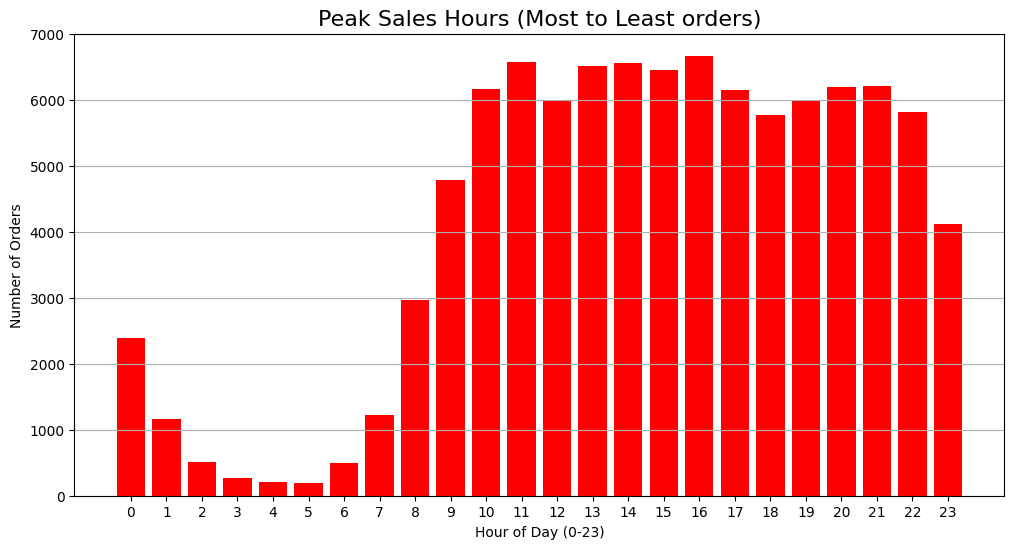

In [26]:
plt.figure(figsize = (12,6))
plt.bar(df['purchase_hour'],
df['total no. of orders'], color = 'red')
plt.title('Peak Sales Hours (Most to Least orders)', fontsize = 16)
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Orders')
plt.xticks(range(24)) # Ensure all 24 hours are shown.
plt.grid(axis = 'y')
plt.show()

# * Top 5 States by Number of Orders

In [195]:
query = """
SELECT 
    customers.customer_state AS state,
    COUNT(DISTINCT orders.order_id) AS total_orders
FROM 
    customers
JOIN 
    orders 
ON 
    customers.customer_id = orders.customer_id
GROUP BY 
    customers.customer_state
ORDER BY 
    total_orders DESC
LIMIT 5
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["State", "Total_Orders"])
df

,State,Total_Orders
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


C:\Users\smart\AppData\Local\Temp\ipykernel_5124\602145963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="State", y="Total_Orders", palette = "Blues_d")


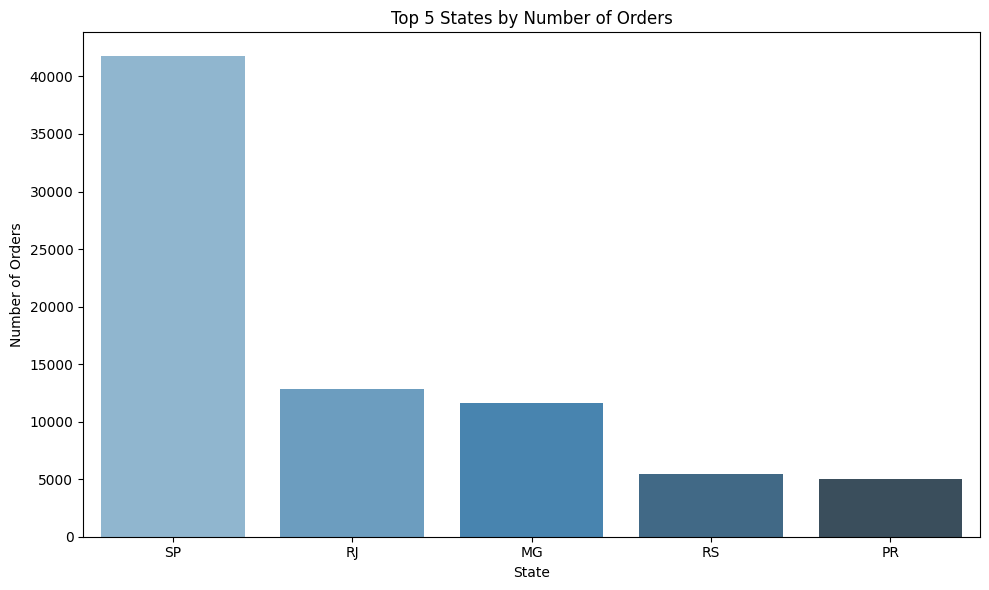

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sort by Total_Orders descending
df_sorted = df.sort_values("Total_Orders", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="State", y="Total_Orders", palette = "Blues_d")
plt.title("Top 5 States by Number of Orders")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# D. Customer Review Analysis

# * Average review score by product category

In [209]:
query = """
SELECT 
    product_category_name_translation.product_category_name_english AS Category,
    ROUND(AVG(order_reviews.review_score), 2) AS Average_Review_Score
FROM 
    order_reviews
JOIN 
    orders
    ON order_reviews.order_id =orders.order_id
JOIN 
    order_items
    ON orders.order_id = order_items.order_id
JOIN 
    products
    ON order_items.product_id = products.product_id
JOIN 
    product_category_name_translation 
    ON products.product_category_name = product_category_name_translation.product_category_name
WHERE 
    order_reviews.review_score IS NOT NULL
GROUP BY 
    product_category_name_translation.product_category_name_english
ORDER BY 
    Average_Review_Score DESC
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "Average_Review_Score"])
df

,Category,Average_Review_Score
0,cds_dvds_musicals,4.64
1,fashion_childrens_clothes,4.50
2,books_general_interest,4.45
3,costruction_tools_tools,4.44
4,flowers,4.42
...,...,...
66,fashion_male_clothing,3.64
67,home_comfort_2,3.63
68,office_furniture,3.49
69,diapers_and_hygiene,3.26


C:\Users\smart\AppData\Local\Temp\ipykernel_5124\138641415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="Category", y="Average_Review_Score", palette="viridis")


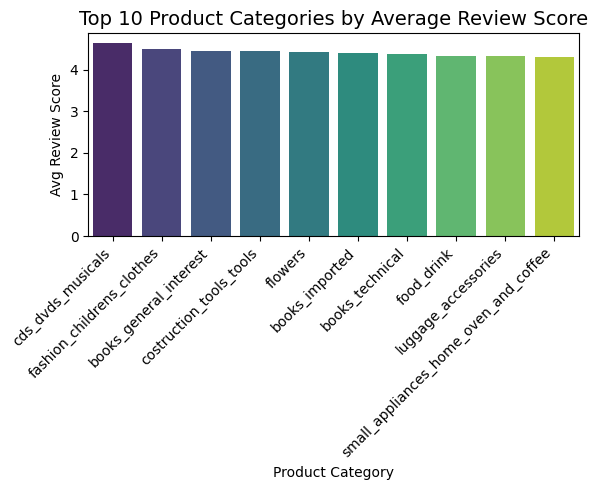

In [211]:
# Sort and take top 10
top10 = df.sort_values("Average_Review_Score", ascending=False).head(10)
plt.figure(figsize=(6,5))
sns.barplot(data=top10, x="Category", y="Average_Review_Score", palette="viridis")
plt.title("Top 10 Product Categories by Average Review Score", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Avg Review Score")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()